In [46]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
import glob
from functools import partial
from scipy.signal import savgol_filter
from scipy.signal import argrelmax, find_peaks_cwt
from scipy.signal import find_peaks
pd.set_option('display.max_rows', 10000, 'display.max_columns', 10000)

In [2]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.use('Qt5Agg')

/Applications/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/Applications/anaconda2/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/Applications/anaconda2/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/Applications/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Applications/anaconda2/lib/python2.7/site-packages/traitlets/config/application.py", line 664, in launch_instance
    app.start()
  File "/Applications/anaconda2/lib/python2.7/site-packages/ipykernel/kernelapp.py"

In [10]:
Mediana= pd.read_excel(r'/Users/thaismedeiros/Documentos/mesocosmos/espectros/Espectros_Ma_Mh_TF.xlsx', index_col=0, sheet_name="m_alcicornis"
                   ).T

Mediana.head()

Wavelength,370,371,372,373,374,375,376,377,378,379,...,760,761,762,763,764,765,766,767,768,769
funil-c,0.022570,0.022519,0.022679,0.022768,0.022649,0.022306,0.021860,0.022044,0.022226,0.022118,...,0.236375,0.237306,0.238088,0.238778,0.239403,0.239980,0.240502,0.241001,0.241504,0.242032
taquaruçu-c,0.080353,0.082027,0.083441,0.084838,0.085775,0.086319,0.086884,0.088025,0.088831,0.089074,...,0.416755,0.417243,0.417506,0.417675,0.417785,0.417835,0.417833,0.417834,0.417870,0.417949
mourao-c,0.013426,0.013206,0.012818,0.013025,0.012967,0.012538,0.012161,0.012336,0.012452,0.012217,...,0.251623,0.252469,0.253172,0.253785,0.254331,0.254822,0.255256,0.255668,0.256087,0.256532
labirinto-c,0.066565,0.067957,0.069353,0.070389,0.071163,0.071724,0.072139,0.073078,0.073798,0.074034,...,0.360557,0.360946,0.361163,0.361300,0.361393,0.361451,0.361468,0.361484,0.361526,0.361612
taquaruçu-t,0.299331,0.307757,0.314946,0.321562,0.327820,0.333455,0.338031,0.342472,0.346442,0.349765,...,0.747902,0.748373,0.748696,0.748962,0.749193,0.749387,0.749570,0.749732,0.749894,0.750096


# fazendo as integrais de linha¶

In [47]:
df= pd.read_excel(r'/Users/thaismedeiros/Documentos/mesocosmos/espectros/Espectros_Ma_Mh_TF.xlsx', index_col=0, sheet_name="m_alcicornis"
                   ).T

df.head()

Wavelength,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769
funil-c,0.022570,0.022519,0.022679,0.022768,0.022649,0.022306,0.021860,0.022044,0.022226,0.022118,0.022171,0.022189,0.022117,0.021972,0.021902,0.021907,0.021930,0.021903,0.022031,0.022099,0.022022,0.021982,0.021990,0.021915,0.021719,0.021858,0.022139,0.022283,0.022044,0.022013,0.022100,0.022140,0.021985,0.021943,0.021940,0.021855,0.021917,0.021918,0.021816,0.021720,0.021765,0.021866,0.021884,0.021615,0.021574,0.021680,0.021708,0.021814,0.021837,0.021784,0.021812,0.021848,0.021906,0.021996,0.022102,0.022098,0.022088,0.022204,0.022204,0.022242,0.022349,0.022412,0.022577,0.022699,0.022700,0.022805,0.022913,0.022994,0.023055,0.023099,0.023167,0.023272,0.023395,0.023485,0.023585,0.023738,0.023897,0.024040,0.024165,0.024278,0.024388,0.024516,0.024655,0.024733,0.024802,0.024858,0.024897,0.024973,0.025068,0.025154,0.025199,0.025265,0.025347,0.025437,0.025553,0.025669,0.025788,0.025920,0.026055,0.026198,0.026364,0.026574,0.026754,0.026932,0.027142,0.027355,0.027588,0.027836,0.028086,0.028344,0.028588,0.028822,0.029111,0.029360,0.029577,0.029806,0.030054,0.030284,0.030483,0.030665,0.030854,0.031044,0.031232,0.031442,0.031660,0.031882,0.032114,0.032401,0.032694,0.032979,0.033317,0.033638,0.033991,0.034415,0.034774,0.035157,0.035576,0.035973,0.036377,0.036790,0.037214,0.037667,0.038076,0.038466,0.038895,0.039314,0.039737,0.040168,0.040596,0.040989,0.041386,0.041818,0.042236,0.042636,0.043036,0.043469,0.043921,0.044378,0.044835,0.045297,0.045791,0.046307,0.046829,0.047398,0.048013,0.048656,0.049304,0.050001,0.050756,0.051561,0.052378,0.053255,0.054187,0.055135,0.056098,0.057075,0.058065,0.059068,0.059994,0.060911,0.061929,0.063008,0.064140,0.065312,0.066508,0.067742,0.068993,0.070245,0.071515,0.072785,0.074049,0.075309,0.076588,0.077880,0.079143,0.080295,0.081329,0.082261,0.083113,0.083893,0.084588,0.085190,0.085700,0.086125,0.086490,0.086808,0.087073,0.087230,0.087291,0.087305,0.087285,0.087267,0.087269,0.087278,0.087250,0.087186,0.087105,0.087023,0.086960,0.086943,0.087002,0.087121,0.087339,0.087669,0.088047,0.088510,0.089051,0.089653,0.090322,0.091031,0.091732,0.092345,0.092857,0.093234,0.093452,0.093527,0.093425,0.093156,0.092769,0.092359,0.092001,0.091642,0.091006,0.090051,0.088969,0.088015,0.087141,0.086339,0.085617,0.084996,0.084464,0.084024,0.083667,0.083359,0.083082,0.082820,0.082559,0.082294,0.081989,0.081638,0.081283,0.080909,0.080508,0.080097,0.079

In [88]:
#Remoção do continuo

def get_interpolated_value(vetor):
        
    return np.trapz(vetor)

def get_continuum(vetor):
    x= vetor.index[[0, -1]]
    array= vetor.values
    y = [array[0], array[-1]]
    b, a= np.polyfit(x,y,1)
    continuum=a+b*vetor.index
   
    return continuum

def continuum_remove(v, lambda_min, lambda_max):
    vetor = v.loc[slice(lambda_min,lambda_max)]
    remover= get_continuum(vetor)
    vetor2 = vetor.values-remover
    r=get_interpolated_value(vetor2)
    
    plt.axes()
    plt.plot(np.arange(vetor.size),vetor.values, color='b', label='original_data')
    plt.plot(np.arange(remover.size),remover, color='r', label='continuo_removido')
    plt.legend()
    
    return r
    
def get_profundidade_from_continuum(v, lambda_min, lambda_max):
    vetor = v.loc[slice(lambda_min,lambda_max)]
    remover= get_continuum(vetor)
    vetor2 = vetor.values-remover
    
    xmax = vetor2.max()
    xmin = vetor2.min()
      
    return xmax - xmin

def get_value_depth(v, lambda_min, lambda_max):
    vetor = v.loc[slice(lambda_min,lambda_max)]
    
    xmax = vetor.max()
    xmin = vetor.min()
      
    return xmax - xmin
    

def get_grau_funilamento(v, lambda_min, lambda_max):
    altura= get_value_depth(v, lambda_min, lambda_max)
    delta_lambda= (lambda_max - lambda_min)//2
    v1= v.loc[slice(lambda_min,lambda_min+delta_lambda)]
    v2= v.loc[slice(lambda_min+delta_lambda,lambda_max)]
    esquerdo= v1.values[np.argmin(np.abs(altura-v1.values))]
    direito= v2.values[np.argmin(np.abs(altura-v2.values))]
    
    return np.abs(esquerdo-direito)
    
    
    

    

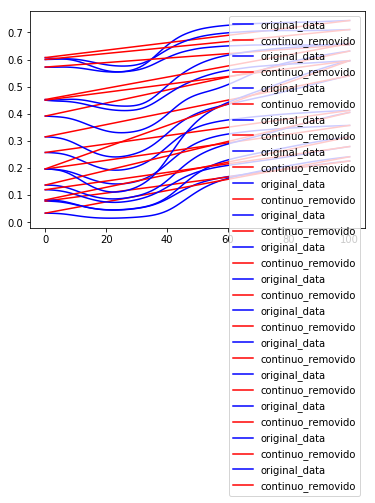

In [67]:
lista = []
lista_prof_continuum= []


lambdas = [(650, 750)]
nomes = []
for l in lambdas:
    variable = df.apply(continuum_remove, lambda_min=l[0], lambda_max=l[1], axis=1)
    nomes.append('Remocao_continuum_'+str(l[0])+'_'+str(l[1]))
    lista.append(variable)
    
    
    profundidade=df.apply(get_profundidade_from_continuum, lambda_min=l[0], lambda_max=l[1], axis=1)
    lista_prof_continuum.append(profundidade)
    
    
    

In [75]:
   
df_temp1 = pd.DataFrame(data=lista, index=nomes).T

df_temp2 = pd.DataFrame(data=lista_prof_continuum, index=nomes).T
df_temp2.columns = ['prof_cont']

result_df= pd.concat([df_temp1,df_temp2], axis=1)
result_df


,Remocao_continuum_650_750,prof_cont
funil-c,-2.184324,0.073274
taquaruçu-c,-1.742138,0.130099
mourao-c,-2.393126,0.089918
labirinto-c,-1.433420,0.128230
taquaruçu-t,-0.631109,0.124712
labirinto-t,-4.070529,0.123065
mourao-t,-2.852583,0.086029
funil-t,-0.009640,0.086058
Labirinto-ph,0.219085,0.067109
funil-ph,-2.914943,0.111337


## Largura a meia altura 





In [94]:
result_df['prof_vale_ref'] = df.apply(get_value_depth, lambda_min=l[0], lambda_max=l[1], axis=1)
result_df ['convectividade_funil'] = df.apply(get_grau_funilamento, lambda_min=l[0], lambda_max=l[1], axis=1)
result_df ['area'] = df.apply(lambda x:get_interpolated_value(x.loc[[l[0],l[1]]]), axis=1)

result_df


,Remocao_continuum_650_750,prof_cont,prof_vale_ref,convectividade_funil,area
funil-c,-2.184324,0.073274,0.180779,0.038631,0.152647
taquaruçu-c,-1.742138,0.130099,0.220176,0.130970,0.335328
mourao-c,-2.393126,0.089918,0.226237,0.112127,0.138248
labirinto-c,-1.433420,0.128230,0.215708,0.078653,0.277137
taquaruçu-t,-0.631109,0.124712,0.189173,0.154787,0.675655
labirinto-t,-4.070529,0.123065,0.318593,0.074792,0.271637
mourao-t,-2.852583,0.086029,0.205604,0.018968,0.200248
funil-t,-0.009640,0.086058,0.134431,0.105830,0.655480
Labirinto-ph,0.219085,0.067109,0.100850,0.085992,0.613666
funil-ph,-2.914943,0.111337,0.268855,0.088079,0.199163
